# Business Problem
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

In [1]:
#Importing the datasets
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading the datasets
df=pd.read_csv('aerofit_treadmill.csv')
print(df)

    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0     KP281   18    Male         14        Single      3        4   29562   
1     KP281   19    Male         15        Single      2        3   31836   
2     KP281   19  Female         14     Partnered      4        3   30699   
3     KP281   19    Male         12        Single      3        3   32973   
4     KP281   20    Male         13     Partnered      4        2   35247   
..      ...  ...     ...        ...           ...    ...      ...     ...   
175   KP781   40    Male         21        Single      6        5   83416   
176   KP781   42    Male         18        Single      5        4   89641   
177   KP781   45    Male         16        Single      5        5   90886   
178   KP781   47    Male         18     Partnered      4        5  104581   
179   KP781   48    Male         18     Partnered      4        5   95508   

     Miles  
0      112  
1       75  
2       66  
3       85  
4       47

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
# Displaying the shape of the dataset
print("Number of rows and columns:", df.shape)

Number of rows and columns: (180, 9)


In [6]:
# Displaying the data type of each column
print(df.dtypes)

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


There are no null values. Hence there are no missing entries that could potentially bias the analysis.

# Detection of Outliers

In [7]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


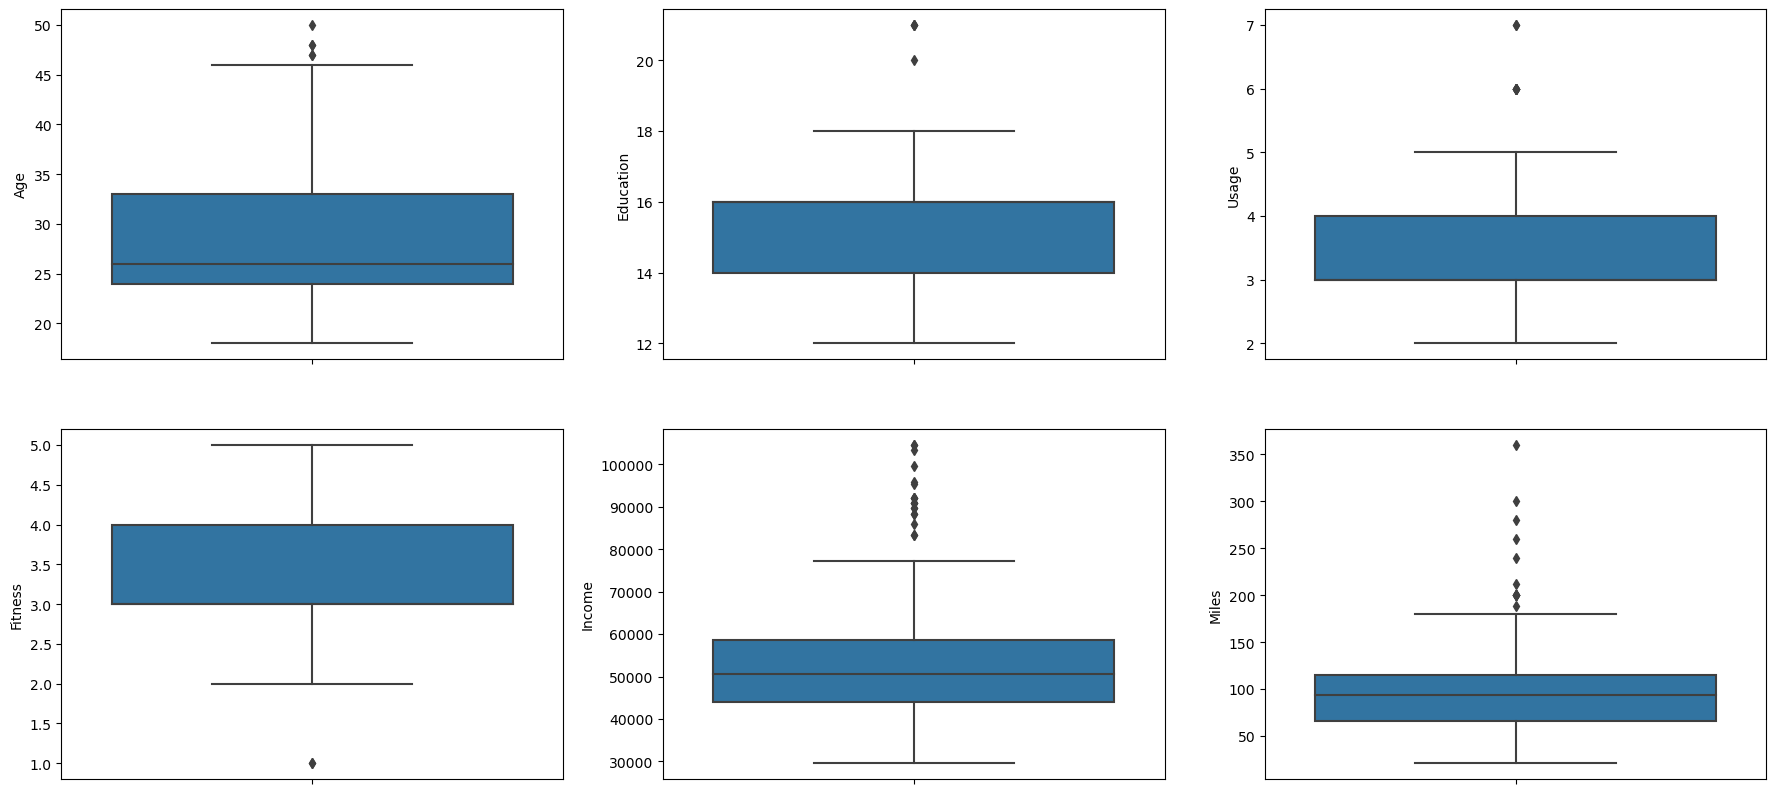

In [8]:
plt.figure(figsize=(22, 10))

#subplot 1
plt.subplot(2,3,1)
sns.boxplot(data=df, y='Age')
#subplot 2
plt.subplot(2,3,2)
sns.boxplot(data=df, y='Education')
#subplot 3
plt.subplot(2,3,3)
sns.boxplot(data=df, y='Usage')
#subplot 4
plt.subplot(2,3,4)
sns.boxplot(data=df, y='Fitness')
#subplot 5
plt.subplot(2,3,5)
sns.boxplot(data=df, y='Income')
#subplot 6
plt.subplot(2,3,6)
sns.boxplot(data=df, y='Miles')

plt.show()

Here we observe the variances between the mean and median (50th percentile) across all the columns above which can be shown in the table as well as
the graph.
Positive skewness is evident in Age (in years), Usage (weekly), Fitness (self-rated fitness on a 1-to-5 scale), Income, and Miles
(distance covered by walking/running), while negative skewness is apparent in Education (total number of years).

*Age* : A younger population demographic is more inclined to purchase most of the products, with some exceptions.
    
*Usage* : The majority of users exhibit low to moderate engagement in a week, with a few highly engaged outliers.
    
*Income* : There is a larger segment with lower income, potentially suggesting affordability as a key factor in purchasing decisions with multiple outliers above 80000.

*Miles* : Most users walk/run shorter distances, although a few outliers are covering significantly longer distances.
    
Understanding these trends could inform targeted marketing strategies or product development tailored to different age groups or
income brackets.

Negative skewness is observed in Education, signifying a concentration of individuals with fewer years of schooling and a smaller proportion with higher educational attainment. This suggests a potential focus on individuals with lower educational backgrounds when targeting the audience. But when checked for each product in a box plot then we do not see any outliner  

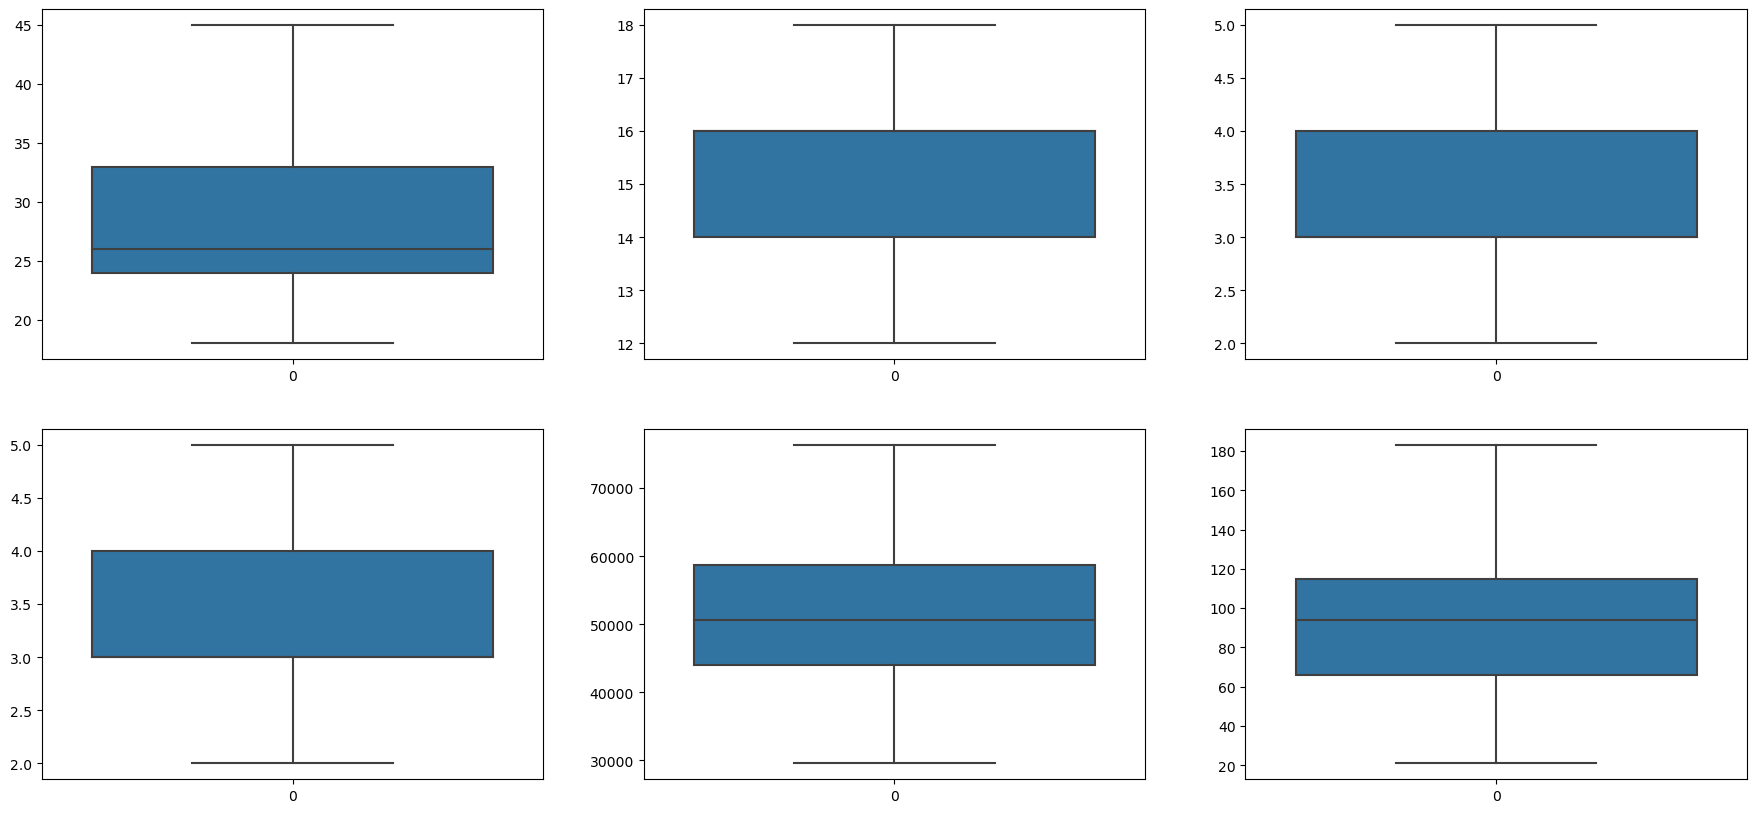

In [9]:
plt.figure(figsize=(22,10))

# subplot 1
plt.subplot(2,3,1)
low, high=df.Age.quantile([0, 0.97]).astype(int)
df_age=df.Age.clip(low, high)
sns.boxplot(data=df_age)
# subplot 2
plt.subplot(2,3,2)
low, high=df.Education.quantile([0, 0.98]).astype(int)
df_Education=df.Education.clip(low, high)
sns.boxplot(data=df_Education)
# subplot 3
plt.subplot(2,3,3)
low, high=df.Usage.quantile([0, 0.94]).astype(int)
df_Usage=df.Usage.clip(low, high)
sns.boxplot(data=df_Usage)
# subplot 4
plt.subplot(2,3,4)
low, high=df.Fitness.quantile([0.02, 1]).astype(int)
df_Fitness=df.Fitness.clip(low, high)
sns.boxplot(data=df_Fitness)
# subplot 5
plt.subplot(2,3,5)
low, high=df.Income.quantile([0, 0.89]).astype(int)
df_Income=df.Income.clip(low, high)
sns.boxplot(data=df_Income)
# subplot 6
plt.subplot(2,3,6)
low, high=df.Miles.quantile([0, 0.93]).astype(int)
df_Miles=df.Miles.clip(low, high)
sns.boxplot(data=df_Miles)

plt.show()

Manually adjusting the Percentile range based on outliners of each column to get a least biased data frame as much as possible by using
Clipping/clip()
Defination: Given an interval, values outside the interval are clipped to the interval edges. For example, if an interval of [0,1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.

In [10]:
df1=df
low, high=df1.Age.quantile([0, 0.97]).astype(int)
df1.Age=df1.Age.clip(low, high)
low, high=df1.Education.quantile([0, 0.98]).astype(int)
df1.Education=df1.Education.clip(low, high)
low, high=df1.Usage.quantile([0, 0.94]).astype(int)
df1.Usage=df1.Usage.clip(low, high)
low, high=df1.Fitness.quantile([0.02, 1]).astype(int)
df1.Fitness=df1.Fitness.clip(low, high)
low, high=df1.Income.quantile([0, 0.89]).astype(int)
df1.Income=df1.Income.clip(low, high)
low, high=df1.Miles.quantile([0, 0.93]).astype(int)
df1.Miles=df1.Miles.clip(low, high)
df1.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.00000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.70000,15.511111,3.394444,3.322222,51986.761111,99.522222
std,6.70937,1.462717,0.948372,0.937461,12571.018690,41.436828
min,18.00000,12.000000,2.000000,2.000000,29562.000000,21.000000
25%,24.00000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.00000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.00000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,45.00000,18.000000,5.000000,5.000000,76331.000000,183.000000


## Business Insights:
The average age of customers is approximately 28 years old, with the majority having an education level of around 15 years. This suggests that the target audience might be young adults who have completed some form of higher education. The youngest customer is 18, and the oldest is approximately 45.63 years old. Understanding this age distribution can help businesses target specific age groups for marketing campaigns or product development.

The education level of customers varies, with a minimum of 12 years and a maximum of 18.84 years. This suggests a diverse customer base with varying preferences and needs. Businesses can conduct further market research to understand how education level correlates with product preferences and tailor their offerings accordingly.

The average product usage is around 3.4 days per week, and customers have an average fitness level of 3.32. This indicates that customers are moderately engaged with the product and are moderately fit. These insights underscore the importance of promoting features that encourage consistent product usage while aligning with the fitness goals and preferences of the customer base.

The average income is approximately 51,987 dollars with a standard deviation of 12,571 dollars. This indicates that the target market has a moderate to moderate-high income level. Businesses can use this information to price their products accordingly and offer appropriate discounts or financing options. On average, customers cover around 99.58 miles.
This information is valuable, as it allows us to understand the average distance customers travel by walking/running and tailor our services or products to accommodate this.

In [11]:
df1[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']].corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.303753,0.016067,0.058088,0.555540,0.025002
Education,0.303753,1.000000,0.389479,0.437379,0.645252,0.358822
Usage,0.016067,0.389479,1.000000,0.660556,0.447165,0.779033
Fitness,0.058088,0.437379,0.660556,1.000000,0.506231,0.833085
Income,0.555540,0.645252,0.447165,0.506231,1.000000,0.489584
Miles,0.025002,0.358822,0.779033,0.833085,0.489584,1.000000


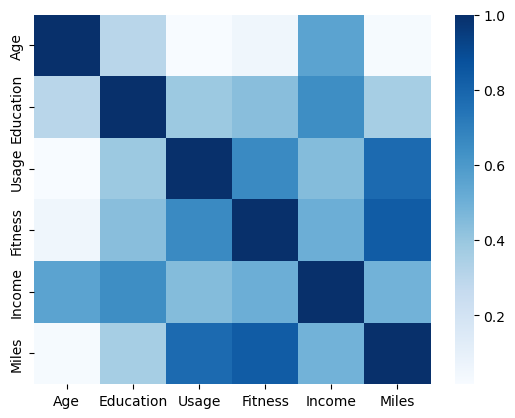

In [12]:
sns.heatmap(data=df1[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']].corr(), cmap='Blues')
plt.show()

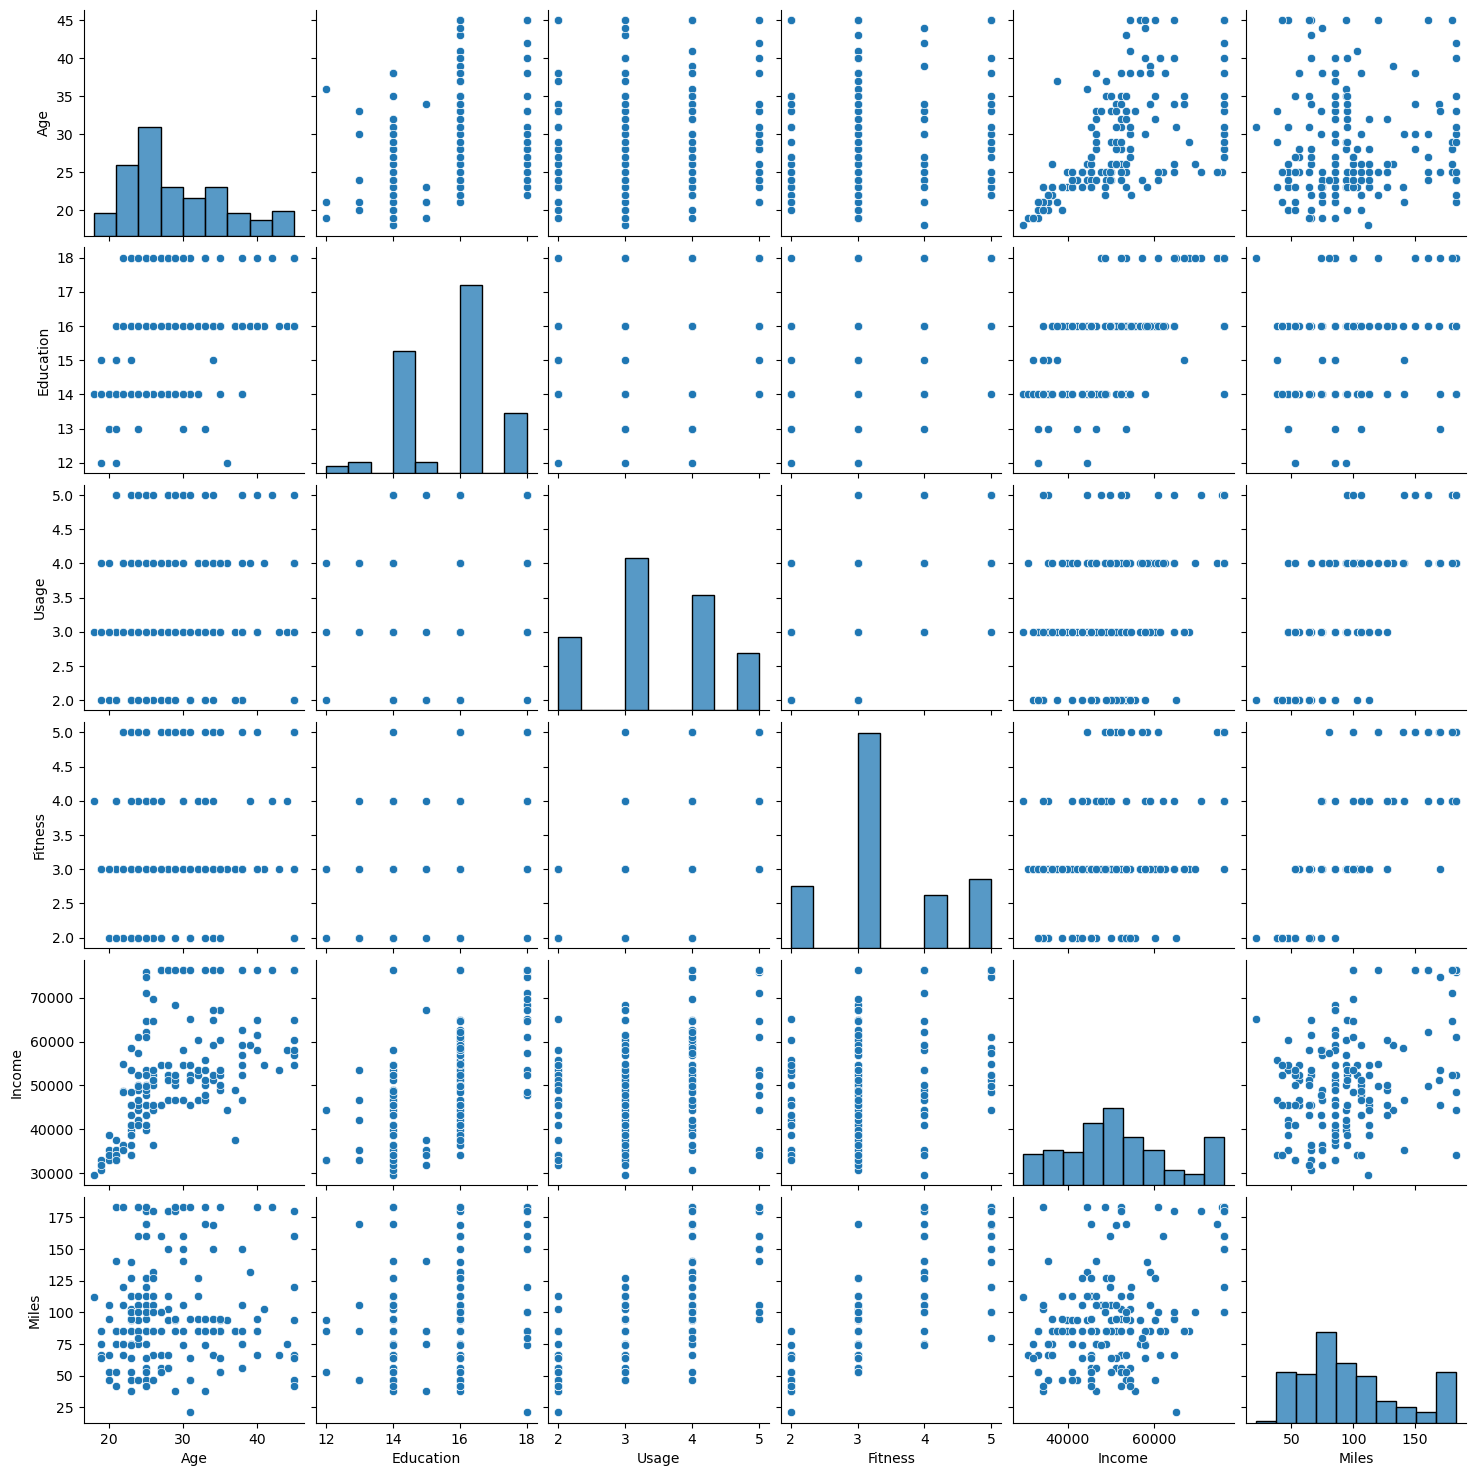

In [13]:
sns.pairplot(data=df1)
plt.show()

## Conclusion and Insights:
* Income and Education: There is a strong positive correlation (0.65) between income and education. This suggests that individuals with higher levels of education tend to have higher incomes.
* Fitness and Usage: There is a strong positive correlation (0.66) between fitness and usage. This implies that individuals who use fitnessrelated products or services tend to be more fitness-conscious.
* Fitness and Miles: There is a very strong positive correlation (0.83) between fitness and miles. This indicates that individuals who are more fitness-conscious tend to cover more miles, likely indicating higher levels of physical activity.
* Usage and Miles: There is a strong positive correlation (0.78) between usage and miles. This suggests that individuals who use a particular product or service tend to cover more miles, potentially indicating frequent usage or engagement with the product/service.
* Income and Age: There is a moderate positive correlation (0.55) between income and age. This implies that older individuals tend to have higher incomes, which could be due to factors such as career advancement or accumulation of wealth over time.

In [14]:
df1.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


## Column wise analysis

In [15]:
df1.Product.value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [16]:
df1.Age.value_counts()

25    25
23    18
24    12
26    12
28     9
45     8
35     8
33     8
38     7
21     7
22     7
27     7
30     7
29     6
34     6
31     6
40     5
20     5
19     4
32     4
37     2
43     1
44     1
18     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [17]:
df1.Gender.value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [18]:
df1.Education.value_counts()

16    85
14    55
18    27
15     5
13     5
12     3
Name: Education, dtype: int64

In [19]:
df1.MaritalStatus.value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [20]:
df1.Usage.value_counts()

3    69
4    52
2    33
5    26
Name: Usage, dtype: int64

In [21]:
df1.Fitness.value_counts()

3    97
5    31
2    28
4    24
Name: Fitness, dtype: int64

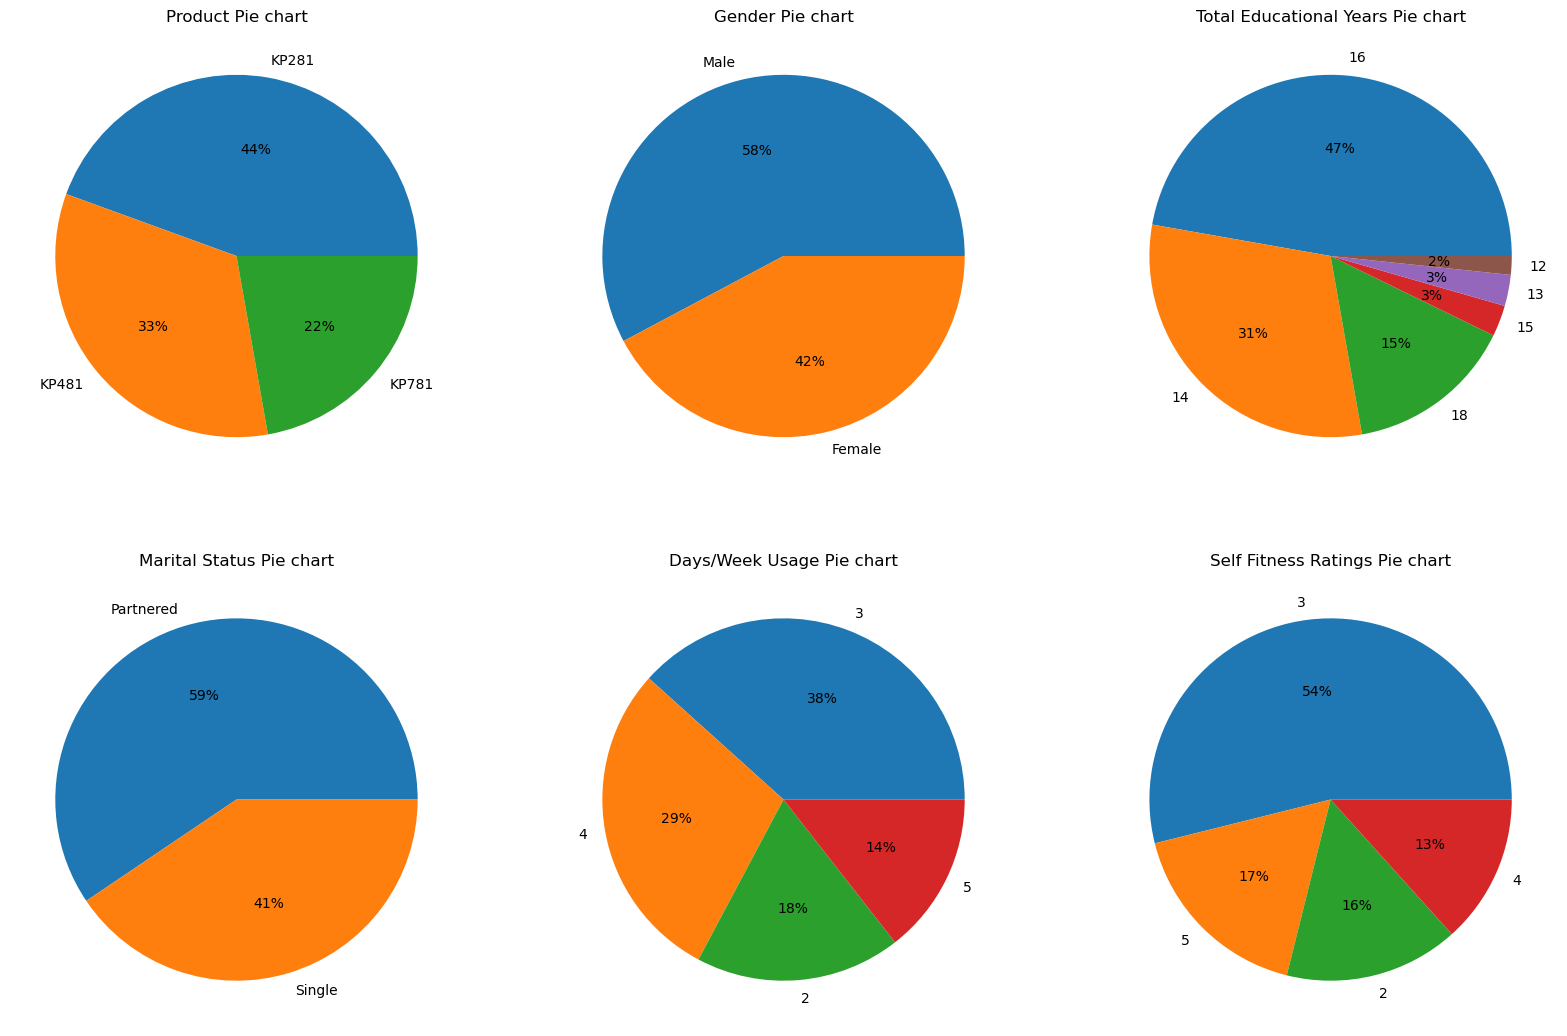

In [22]:
plt.figure(figsize=(20,20))

#subplot 1
plt.subplot(3,3,1)
plt.pie(df1.Product.value_counts(), labels=df1.Product.value_counts().index, autopct='%.0f%%')
plt.title('Product Pie chart')
#subplot 2
plt.subplot(3,3,2)
plt.pie(df1.Gender.value_counts(), labels=df1.Gender.value_counts().index, autopct='%.0f%%')
plt.title('Gender Pie chart')
#subplot 3
plt.subplot(3,3,3)
plt.pie(df1.Education.value_counts(), labels=df1.Education.value_counts().index, autopct='%.0f%%')
plt.title('Total Educational Years Pie chart')
#subplot 4
plt.subplot(3,3,4)
plt.pie(df1.MaritalStatus.value_counts(), labels=df1.MaritalStatus.value_counts().index, autopct='%.0f%%')
plt.title('Marital Status Pie chart')
#subplot 5
plt.subplot(3,3,5)
plt.pie(df1.Usage.value_counts(), labels=df1.Usage.value_counts().index, autopct='%.0f%%')
plt.title('Days/Week Usage Pie chart')
#subplot 6
plt.subplot(3,3,6)
plt.pie(df1.Fitness.value_counts(), labels=df1.Fitness.value_counts().index, autopct='%.0f%%')
plt.title('Self Fitness Ratings Pie chart')

plt.show()

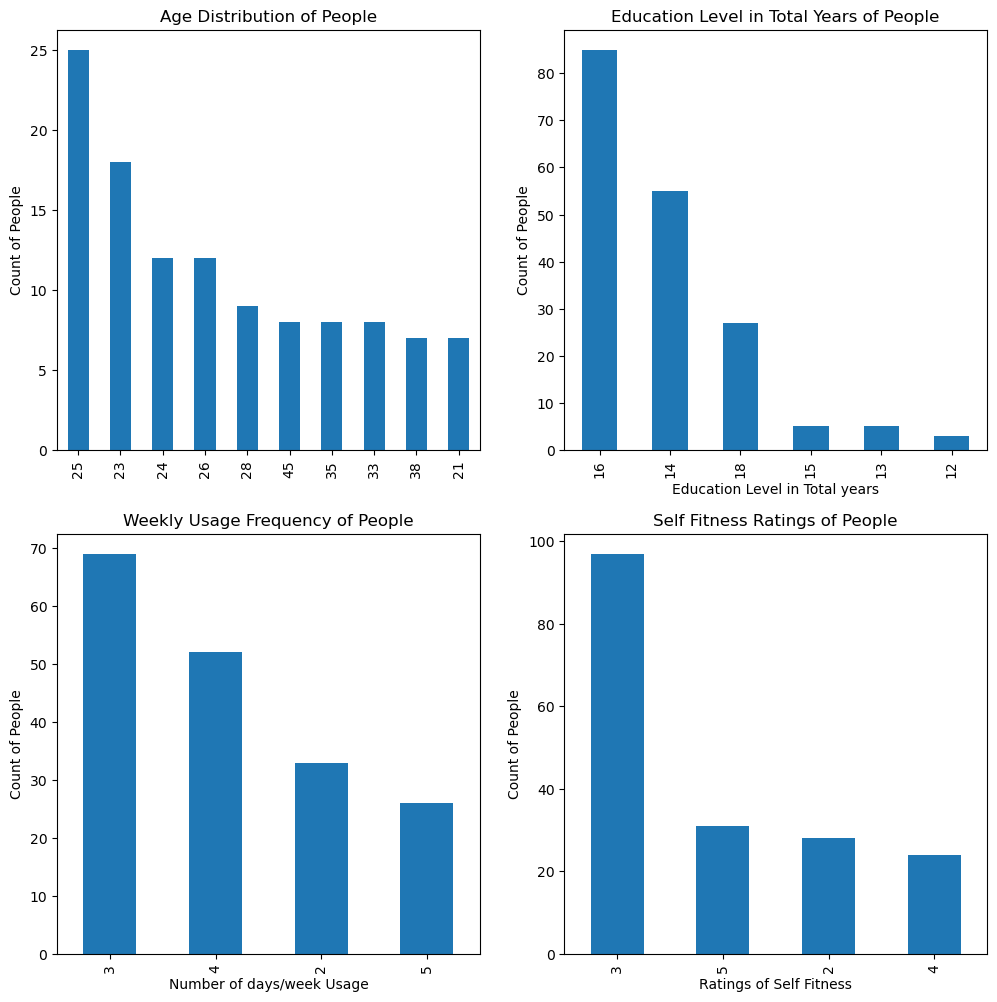

In [23]:
plt.figure(figsize=(12,12))

#subplot 1
plt.subplot(2,2,1)
df1.Age.value_counts().head(10).plot(kind='bar')
plt.title('Age Distribution of People')
plt.ylabel('Count of People')
#subplot 2
plt.subplot(2,2,2)
df1.Education.value_counts().plot(kind='bar')
plt.ylabel('Count of People')
plt.title('Education Level in Total Years of People')
plt.xlabel('Education Level in Total years')
#subplot 3
plt.subplot(2,2,3)
df1.Usage.value_counts().plot(kind='bar')
plt.ylabel('Count of People')
plt.title('Weekly Usage Frequency of People')
plt.xlabel('Number of days/week Usage')
#subplot 4
plt.subplot(2,2,4)
df1.Fitness.value_counts().plot(kind='bar')
plt.ylabel('Count of People')
plt.title('Self Fitness Ratings of People')
plt.xlabel('Ratings of Self Fitness')

plt.show()

### Analysis
Product Preferences: The KP281 treadmill seems to be the most popular choice among customers, with 80 units sold, followed by KP481 (60 units) and KP781 (40 units). This indicates a potential demand for features or price points offered by the KP281 model.
* Age: Customers aged 25 and 23 represent the largest segments, followed by ages 24, 26, and 28. This suggests that the target
demographic for these treadmills is primarily younger adults.

* Gender: Males account for a larger portion of sales (104 units) compared to females (76 units). The company may want to explore marketing strategies to attract more female customers.

* Education: Majority of customers have completed 16 years of education, followed by 14 and 18 years. This could indicate that customers with higher education levels are more likely to purchase these treadmills.

* Marital Status: Partnered individuals (107 units) seem to purchase more treadmills compared to single individuals (73 units). This could imply that partnered individuals are more inclined towards fitness or have higher disposable income for such purchases.

* Usage: Most customers use the treadmills for 3 or 4 times a week, with fewer users engaging in more frequent usage. This information can guide the company in designing features tailored to these usage patterns.

* Fitness Level: Customers with a fitness level of 3 represent the largest segment, followed by level 5. This indicates that the treadmills are attracting customers with moderate to high fitness levels, suggesting the treadmills cater well to fitness enthusiasts.

### Recommendation
Develop marketing campaigns targeting females and single individuals to potentially increase sales in these demographics.

Consider incorporating features or pricing strategies that appeal to a broader age range to capture older customers.

Offer programs or incentives to encourage more frequent usage, potentially increasing customer satisfaction and loyalty.

Educate potential customers about the benefits of using treadmills for fitness, especially targeting demographics with lower fitness levels.

#### Marginal Probability

In [24]:
# contingency table using crosstab
cont_table = pd.crosstab(index=df1['Product'], columns='count')

# Calculate marginal probability
marginal_probability = cont_table / cont_table.sum()

print("Marginal Probabilities:")
print(marginal_probability)

Marginal Probabilities:
col_0       count
Product          
KP281    0.444444
KP481    0.333333
KP781    0.222222


## Productwise deep analysis

In [25]:
print(df1)

    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0     KP281   18    Male         14        Single      3        4   29562   
1     KP281   19    Male         15        Single      2        3   31836   
2     KP281   19  Female         14     Partnered      4        3   30699   
3     KP281   19    Male         12        Single      3        3   32973   
4     KP281   20    Male         13     Partnered      4        2   35247   
..      ...  ...     ...        ...           ...    ...      ...     ...   
175   KP781   40    Male         18        Single      5        5   76331   
176   KP781   42    Male         18        Single      5        4   76331   
177   KP781   45    Male         16        Single      5        5   76331   
178   KP781   45    Male         18     Partnered      4        5   76331   
179   KP781   45    Male         18     Partnered      4        5   76331   

     Miles  
0      112  
1       75  
2       66  
3       85  
4       47

In [26]:
pd.crosstab(df1.Product, df1.Age, margins=True)

Age,18,19,20,21,22,23,24,25,26,27,...,37,38,39,40,41,42,43,44,45,All
Product,,,,,,,,,,,,,,,,,,,,,
KP281,1,3,2,4,4,8,5,7,7,3,...,1,4,1,1,1,0,1,1,3,80
KP481,0,1,3,3,0,7,3,11,3,1,...,1,2,0,3,0,0,0,0,2,60
KP781,0,0,0,0,3,3,4,7,2,3,...,0,1,0,1,0,1,0,0,3,40
All,1,4,5,7,7,18,12,25,12,7,...,2,7,1,5,1,1,1,1,8,180


This representation doesn't look good so we are going to sub-group the age in 3 levels: Youngsters, middles, Active for better analysis

In [27]:
# Temp for Age grouping
def temp(x):
    if x<26:
        return 'Youngsters'
    elif x>35:
        return 'Middles'
    else:
        return 'Active Achievers'

In [28]:
df1['Age_groups']=df1.Age.apply(temp)
print(df1)

    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0     KP281   18    Male         14        Single      3        4   29562   
1     KP281   19    Male         15        Single      2        3   31836   
2     KP281   19  Female         14     Partnered      4        3   30699   
3     KP281   19    Male         12        Single      3        3   32973   
4     KP281   20    Male         13     Partnered      4        2   35247   
..      ...  ...     ...        ...           ...    ...      ...     ...   
175   KP781   40    Male         18        Single      5        5   76331   
176   KP781   42    Male         18        Single      5        4   76331   
177   KP781   45    Male         16        Single      5        5   76331   
178   KP781   45    Male         18     Partnered      4        5   76331   
179   KP781   45    Male         18     Partnered      4        5   76331   

     Miles  Age_groups  
0      112  Youngsters  
1       75  Youngsters  


Youngsters : Ages 18-25

Active Achievers : Ages 26-35

Middles: Ages 36-45

In [29]:
pd.crosstab(df1.Product, df1.Age_groups, margins=True)

Age_groups,Active Achievers,Middles,Youngsters,All
Product,,,,
KP281,32,14,34,80
KP481,24,8,28,60
KP781,17,6,17,40
All,73,28,79,180


In [30]:
crosstab_df_age = pd.crosstab(df1.Product, df1.Age_groups, margins=True)
# Calculate the probability of each cell
total_count = crosstab_df_age.loc['All', 'All'] 

probability_table = crosstab_df_age / total_count
print(probability_table)

Age_groups  Active Achievers   Middles  Youngsters       All
Product                                                     
KP281               0.177778  0.077778    0.188889  0.444444
KP481               0.133333  0.044444    0.155556  0.333333
KP781               0.094444  0.033333    0.094444  0.222222
All                 0.405556  0.155556    0.438889  1.000000


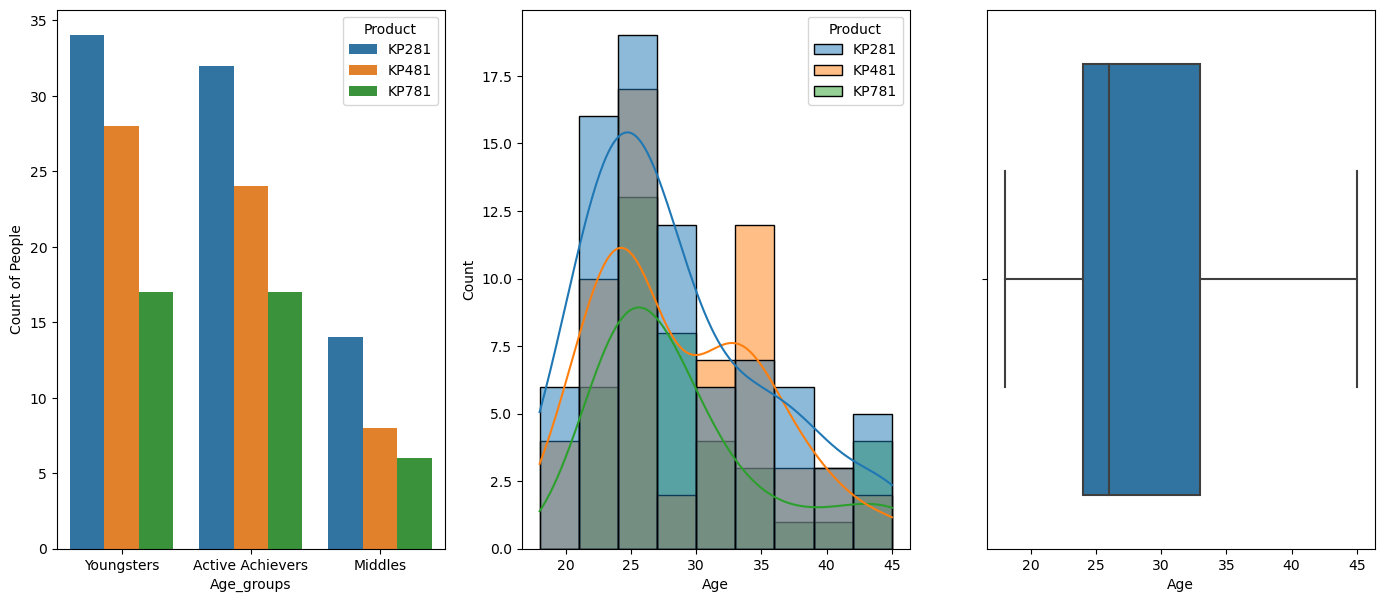

In [31]:
#Plotting the graph for 'Age' by Groupwise

plt.figure(figsize=(17,7))
plt.subplot(1,3,1)
sns.countplot(data=df1, x='Age_groups', hue='Product')
plt.ylabel('Count of People')
plt.subplot(1,3,2)
sns.histplot(data=df1, x='Age', hue='Product', kde=True)
plt.subplot(1,3,3)
sns.boxplot(data=df1, x='Age', hue='Product')
plt.show()

## Analysis and Insights:

#### Overall Distribution:

* The total number of customers across all age groups for all products is 180.
* The percentage distribution of customers across age groups shows that Youngsters form the largest segment, followed by Active Achievers and then Middles.

#### Product-wise Distribution:

* KP281: This product has the highest number of customers across all age groups compared to the other two products, indicating it might have broader appeal or better marketing reach compared to the other products.
* KP481: While having fewer customers overall, it still maintains a considerable presence across different age groups, suggesting it has its own niche or specific target audience. Further analysis is needed to understand why it attracts fewer customers across other age groups.
* KP781: This product has the fewest customers, with the majority being Youngsters and some exception which are at the Middles group

### Recommendations:
* Targeted Marketing: Tailor marketing strategies to each age group's preferences. Highlight different product features and benefits that resonate with each segment. Invest more in reaching out to the Active Achievers segment, as they represent a potentially untapped market for growth.
* Product Development: Consider adjusting product features or branding to appeal to specific age groups where the product is underperforming. Conduct market research to understand why KP781 is less popular among certain age groups and make necessary improvements or adjustments.
* Diversification: Explore opportunities to diversify product offerings to cater to a wider range of age groups and preferences. Introduce product bundles or packages that appeal to multiple age groups simultaneously.


In [32]:
pd.crosstab(df1.Product, df1.Education, margins=True)

Education,12,13,14,15,16,18,All
Product,,,,,,,
KP281,2,3,30,4,39,2,80
KP481,1,2,23,1,31,2,60
KP781,0,0,2,0,15,23,40
All,3,5,55,5,85,27,180


In [33]:
crosstab_df_edu = pd.crosstab(df1.Product, df1.Education, margins=True)

# Calculate the probability of each cell

total_count = crosstab_df_edu.loc['All', 'All'] 
probability_table = crosstab_df_edu / total_count
print(probability_table)

Education        12        13        14        15        16        18  \
Product                                                                 
KP281      0.011111  0.016667  0.166667  0.022222  0.216667  0.011111   
KP481      0.005556  0.011111  0.127778  0.005556  0.172222  0.011111   
KP781      0.000000  0.000000  0.011111  0.000000  0.083333  0.127778   
All        0.016667  0.027778  0.305556  0.027778  0.472222  0.150000   

Education       All  
Product              
KP281      0.444444  
KP481      0.333333  
KP781      0.222222  
All        1.000000  


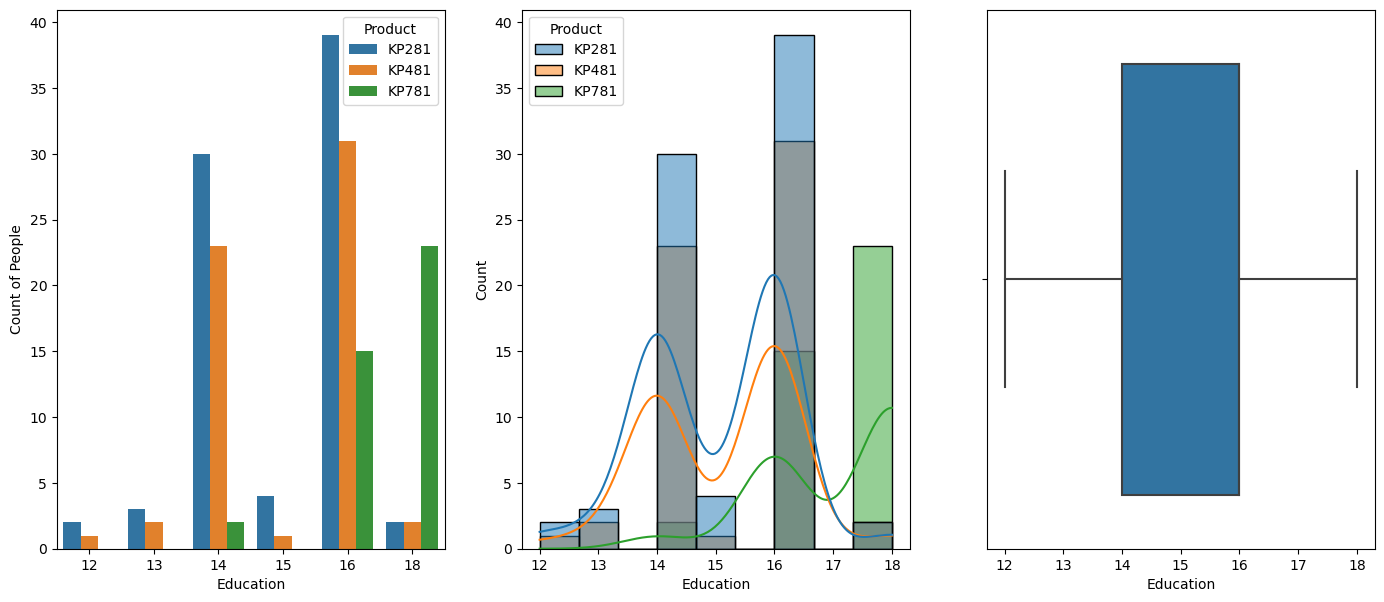

In [34]:
# Plotting the graph for 'Education'

plt.figure(figsize=(17,7))
plt.subplot(1,3,1)
sns.countplot(data=df1, x='Education', hue='Product')
plt.ylabel('Count of People')
plt.subplot(1,3,2)
sns.histplot(data=df1, x='Education', hue='Product', kde=True)
plt.subplot(1,3,3)
sns.boxplot(data=df1, x='Education', hue='Product')
plt.show()

## Analysis:


#### Product Distribution Across Education Levels:

* KP281: Shows a steady increase from education levels 12 to 16, then slightly dips at 18.
* KP481: Similar to KP281 but with a slightly smaller distribution.
* KP781: Low distribution until education level 16, where it sees a significant rise.

<u>Total Distribution Across Education Levels</u>: Overall, there's an increasing trend in product distribution with the progression of education levels. Education level 16 has the highest overall distribution followed by 14 and 18.

<u>Normalized Distribution</u>: The normalized distribution provides a clearer picture of the proportional representation of each product across education levels. KP281 and KP481 dominate the distribution, especially at education level 16. KP781 has a relatively lower but still noticeable presence, particularly at education level 18.

#### Insights:
There's a notable shift in product preferences as education level progresses, with KP281 and KP481 being preferred at higher education levels. Also both the product seems to have successfully penetrated the market across various education levels and there is a dominance of both at education level 16 indicates a higher demand for these products among students at that stage.
KP781 gains traction in the later education years, suggesting it might cater to more advanced educational needs and shows potential for growth, particularly in higher education levels where it gains prominence and suggests a specific need or niche market within higher education institutions.

#### Recommendations : 

* Allocate more marketing resources towards KP281 and KP481 to maintain their stronghold, especially at education level 16. Invest in targeted marketing campaigns for KP781 to capitalize on its rising popularity at education level 18.
* Conduct market research to identify specific features or functionalities that appeal to users at different education levels. 

Consider diversifying product offerings to cater to a broader range of educational needs and preferences.


In [35]:
pd.crosstab(df1.Product, df1.Usage, margins=True)

Usage,2,3,4,5,All
Product,,,,,
KP281,19,37,22,2,80
KP481,14,31,12,3,60
KP781,0,1,18,21,40
All,33,69,52,26,180


In [36]:
crosstab_df_usage = pd.crosstab(df1.Product, df1.Usage, margins=True)

# Calculate the probability of each cell

total_count = crosstab_df_usage.loc['All', 'All'] 
probability_table = crosstab_df_usage / total_count
print(probability_table)

Usage           2         3         4         5       All
Product                                                  
KP281    0.105556  0.205556  0.122222  0.011111  0.444444
KP481    0.077778  0.172222  0.066667  0.016667  0.333333
KP781    0.000000  0.005556  0.100000  0.116667  0.222222
All      0.183333  0.383333  0.288889  0.144444  1.000000


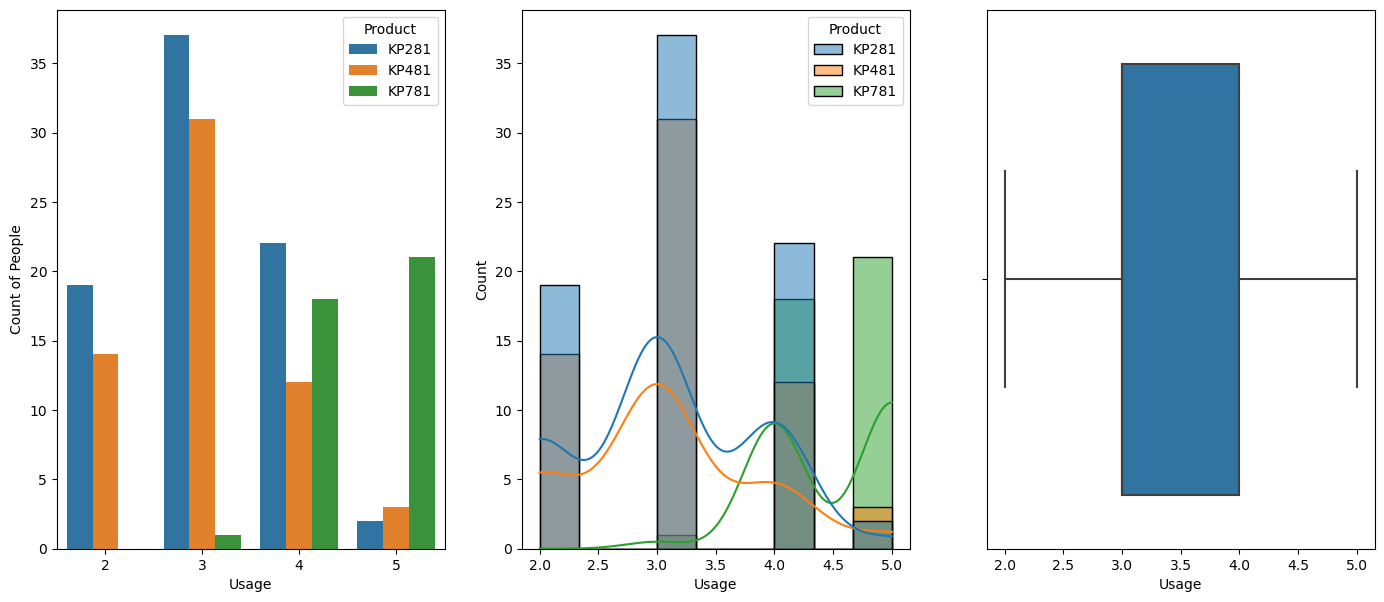

In [37]:
# Plotting the graph for 'Usage'

plt.figure(figsize=(17,7))
plt.subplot(1,3,1)
sns.countplot(data=df1, x='Usage', hue='Product')
plt.ylabel('Count of People')
plt.subplot(1,3,2)
sns.histplot(data=df1, x='Usage', hue='Product', kde=True)
plt.subplot(1,3,3)
sns.boxplot(data=df1, x='Usage', hue='Product')
plt.show()

## Analysis:
    
The table shows the usage of three different products (KP281, KP481, KP781) across different usage frequencies (2, 3, 4, 5 days/week).
The totals across all usage frequencies are also provided for each product.

#### Insights :

<u>KP281</u>: This product has the highest overall usage, with 80 instances reported across all frequencies. It is most commonly used for 3 days a week (37 instances), followed by 2 days a week (19 instances).

<u>KP481</u>: The second most used product with a total of 60 instances. Similar to KP281, it is also most commonly used for 3 days a week (31 instances).
Both products exhibit similar usage distributions, with the highest proportions for 3 days a week, followed by 2 days a week. This suggests a consistent pattern of usage for these products.

<u>KP781</u>: This product has the lowest overall usage, with only 40 instances reported across all frequencies. Notably, it is primarily used for 4 and 5 days a week, with a total of 39 instances. Unlike KP281 and KP481, KP781 shows a more varied usage distribution, with significant proportions for both 4 and 5 days a week, indicating a different usage pattern compared to the other products.

#### Recommendations:
* KP281 & KP481: Focus marketing efforts, production optimization, and inventory management on KP281 and KP481, the most frequently used products. Investigate the reasons behind their popularity (effectiveness, affordability, unique features) to understand how to capitalize on their success. Conduct customer surveys or market research to identify areas for improvement and unmet needs.
* KP781: KP781 has consistent usage across 4 and 5 days a week, indicating a niche market. Explore ways to expand the market by highlighting unique benefits or targeting specific customer segments. Consider adjusting marketing strategies or product positioning to better communicate the value proposition. Monitor customer feedback to ensure KP781 meets target audience needs.


In [38]:
pd.crosstab(df1.Product, df1.Income, margins=True)

Income,29562,30699,31836,32973,34110,35247,36384,37521,38658,39795,...,64809,65220,67083,68220,69721,70966,74701,75946,76331,All
Product,,,,,,,,,,,,,,,,,,,,,
KP281,1,1,1,3,2,5,3,2,3,2,...,1,0,1,1,0,0,0,0,0,80
KP481,0,0,1,2,3,0,1,0,2,0,...,2,1,1,0,0,0,0,0,0,60
KP781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,20,40
All,1,1,2,5,5,5,4,2,5,2,...,3,1,2,1,1,1,1,1,20,180


In [39]:
#Temp Function for Income grouping
def temp_i(x):
    if x<45001:
        return 'Low-Medium'
    elif x>60000:
        return 'High'
    else:
        return 'Medium-High'

In [40]:
df1['Income_groups']=df1.Income.apply(temp_i)

Low-Medium Income: Income range from 29562 to 45000

Medium-High Income: Income range from 45001 to 60000

High Income: Income range from 60001 to 76331

In [41]:
pd.crosstab(df1.Product, df1.Income_groups, margins=True)

Income_groups,High,Low-Medium,Medium-High,All
Product,,,,
KP281,6,34,40,80
KP481,7,15,38,60
KP781,29,0,11,40
All,42,49,89,180


In [42]:
crosstab_df_ig = pd.crosstab(df1.Product, df1.Income_groups, margins=True)

# Calculate the probability of each cell

total_count = crosstab_df_ig.loc['All', 'All'] 
probability_table = crosstab_df_ig / total_count
print(probability_table)

Income_groups      High  Low-Medium  Medium-High       All
Product                                                   
KP281          0.033333    0.188889     0.222222  0.444444
KP481          0.038889    0.083333     0.211111  0.333333
KP781          0.161111    0.000000     0.061111  0.222222
All            0.233333    0.272222     0.494444  1.000000


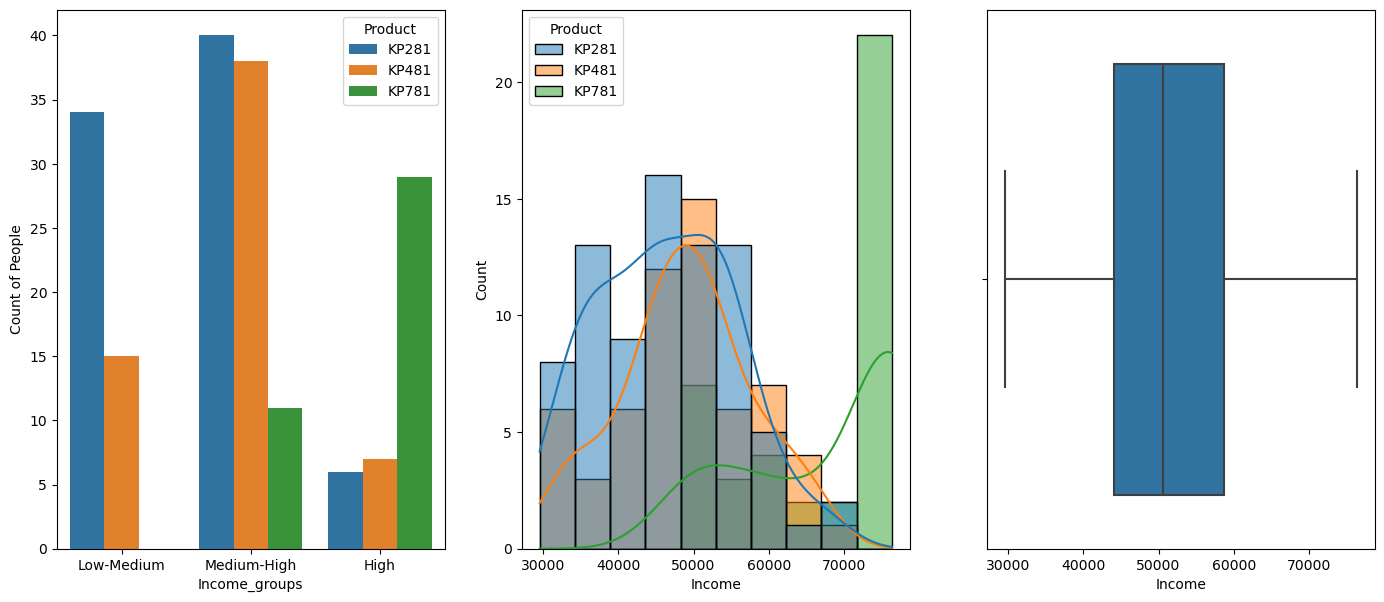

In [43]:
# Plotting the graph for 'Income'

plt.figure(figsize=(17,7))
plt.subplot(1,3,1)
sns.countplot(data=df1, x='Income_groups', hue='Product')
plt.ylabel('Count of People')
plt.subplot(1,3,2)
sns.histplot(data=df1, x='Income', hue='Product', kde=True)
plt.subplot(1,3,3)
sns.boxplot(data=df1, x='Income', hue='Product')
plt.show()

## Analysis:
    
<u>KP281</u>: This product has a relatively balanced distribution across income groups, with a significant portion of sales in the Medium-High income group.
<u>KP481</u>: It shows a similar pattern to KP281, with a substantial share of sales in the Medium-High income group but with fewer sales overall compared to KP281.
<u>KP781</u>: This product is mainly favored by the High-income group, with minimal to no sales recorded in the Low-Medium income group.

* Overall Sales Distribution: The majority of sales come from the Medium-High income group, followed by Low-Medium and High-income groups, in descending order.

#### Insights:
* Income Group Preferences: Products KP281 and KP481 seem to cater well to a wider income range, with a notable presence in both Medium-High and High-income groups. KP781 appears to be a premium product, targeting specifically the High-income group. There's room for expansion in the Medium-High income segment.

* Market Potential: The data suggests untapped potential in the Low-Medium income group, especially for products like KP281 and KP481. There might be opportunities for targeted marketing or pricing strategies to attract this segment.

* Product Portfolio Optimization: Given the dominance of Medium-High income sales, there's a possibility to introduce new products or variants catering to this segment's preferences to further capitalize on this market share.

#### Recommendations:

* Diversification of Marketing Strategies: Develop targeted marketing campaigns to appeal to the Low-Medium income segment, highlighting affordability, value for money, or unique selling propositions of products KP281 and KP481.
* Product Development: Consider expanding the product range within the Medium-High income segment, focusing on features or benefits that resonate with this demographic's preferences.
* Price Optimization: Evaluate pricing strategies to ensure competitiveness across income groups without compromising profitability. Consider discounts, promotions, or bundled offers to attract price-sensitive customers.


In [44]:
pd.crosstab(df1.Product, df1.Miles, margins=True)

Miles,21,38,42,47,53,56,64,66,74,75,...,132,140,141,150,160,169,170,180,183,All
Product,,,,,,,,,,,,,,,,,,,,,
KP281,0,3,0,9,0,6,0,10,0,10,...,2,0,2,0,0,1,0,0,1,80
KP481,1,0,4,0,7,0,6,0,3,0,...,0,0,0,0,0,0,2,0,1,60
KP781,0,0,0,0,0,0,0,0,0,0,...,0,1,0,4,5,0,1,6,11,40
All,1,3,4,9,7,6,6,10,3,10,...,2,1,2,4,5,1,3,6,13,180


In [45]:
#Temp function for Miles grouping
def temp_m(x):
    if x<61:
        return 'Short Range'
    elif x>120:
        return 'Long Range'
    else:
        return 'Medium Range'

In [46]:
df1['Miles_groups']=df1.Miles.apply(temp_m)

Short Range Group: 21-60
    
Medium Range Group: 61-120
    
Long Range Group: 121-183

In [47]:
pd.crosstab(df1.Product, df1.Miles_groups, margins=True)

Miles_groups,Long Range,Medium Range,Short Range,All
Product,,,,
KP281,6,56,18,80
KP481,8,40,12,60
KP781,28,12,0,40
All,42,108,30,180


In [48]:
crosstab_df_miles = pd.crosstab(df1.Product, df1.Miles_groups, margins=True)

# Calculate the probability of each cell

total_count = crosstab_df_miles.loc['All', 'All'] 
probability_table = crosstab_df_miles / total_count
print(probability_table)

Miles_groups  Long Range  Medium Range  Short Range       All
Product                                                      
KP281           0.033333      0.311111     0.100000  0.444444
KP481           0.044444      0.222222     0.066667  0.333333
KP781           0.155556      0.066667     0.000000  0.222222
All             0.233333      0.600000     0.166667  1.000000


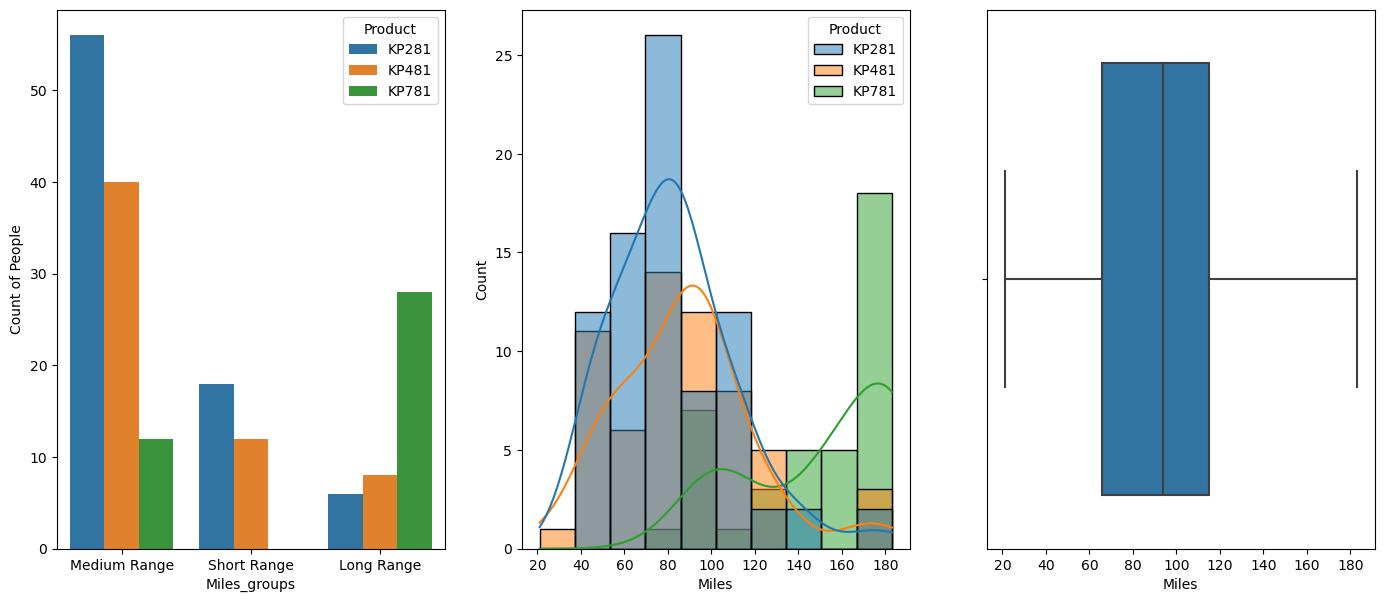

In [49]:
# Plotting the graph for 'Miles Group'

plt.figure(figsize=(17,7))
plt.subplot(1,3,1)
sns.countplot(data=df1, x='Miles_groups', hue='Product')
plt.ylabel('Count of People')
plt.subplot(1,3,2)
sns.histplot(data=df1, x='Miles', hue='Product', kde=True)
plt.subplot(1,3,3)
sns.boxplot(data=df1, x='Miles', hue='Product')
plt.show()

## Analysis :

#### Insights:
    
* KP281 Performance: KP281 has a minimal presence across all mileage ranges. This suggests that it might not be as popular or as wellperforming as the other two products in these categories.
* KP781 Performance: KP781 shows exceptional performance in the medium range miles group. It might be beneficial to focus marketing efforts on promoting KP781 for medium-range applications.
* KP481 Performance: KP481 leads slightly in the short range while being present moderately in other ranges. It could be worth analyzing why KP481 is not performing as well as the others and consider improvements or repositioning in the market.

<u>Overall Distribution</u>: Long Range products constitute the highest percentage of the total product count (23.33%), followed by Medium Range products (60%) and Short Range products (16.67%). This indicates a significant focus on Medium Range products, followed by Long Range, with less emphasis on Short Range offerings.

<u>Consistent High Performance:</u> The box plot indicates that KP781 has a higher median value, suggesting consistent high performance. This could be a selling point when marketing KP781.

#### Recommendations:

* Product Development: Considering the significant portion of products falling into the Medium Range category, there may be an opportunity for product development or enhancement in this segment to cater to the existing demand. Assessing the market demand for Long Range products and potentially investing more resources in this category, especially if there's a growing trend towards longer distance travel.

* Marketing and Sales Strategy: Tailoring marketing and sales strategies to highlight the strengths of each product in its respective mileage category. For example, emphasizing the endurance and efficiency of Long Range products. Conducting market research to understand customer preferences and trends in different mileage categories, enabling more targeted marketing efforts

In [50]:
pd.crosstab(df1.Product, df1.Fitness, margins=True)

Fitness,2,3,4,5,All
Product,,,,,
KP281,15,54,9,2,80
KP481,13,39,8,0,60
KP781,0,4,7,29,40
All,28,97,24,31,180


In [51]:
crosstab_df_fitness = pd.crosstab(df1.Product, df1.Fitness,margins=True)

# Calculate the probability of each cell

total_count = crosstab_df_fitness.loc['All', 'All'] 
probability_table = crosstab_df_fitness / total_count
print(probability_table)

Fitness         2         3         4         5       All
Product                                                  
KP281    0.083333  0.300000  0.050000  0.011111  0.444444
KP481    0.072222  0.216667  0.044444  0.000000  0.333333
KP781    0.000000  0.022222  0.038889  0.161111  0.222222
All      0.155556  0.538889  0.133333  0.172222  1.000000


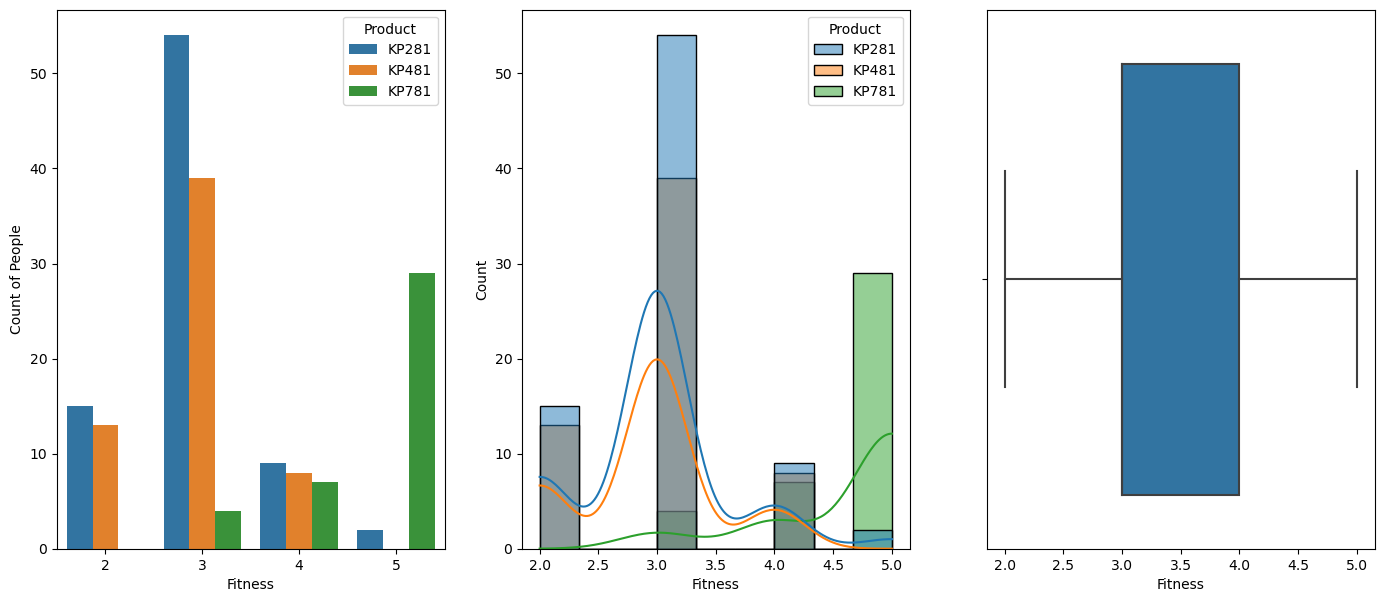

In [52]:
# Plotting the graph for 'Fitness'

plt.figure(figsize=(17,7))
plt.subplot(1,3,1)
sns.countplot(data=df1, x='Fitness', hue='Product')
plt.ylabel('Count of People')
plt.subplot(1,3,2)
sns.histplot(data=df1, x='Fitness', hue='Product', kde=True)
plt.subplot(1,3,3)
sns.boxplot(data=df1, x='Fitness', hue='Product')
plt.show()

## Analysis:
    
* KP281: Most respondents rated their fitness level as 3, followed by 2 and 4. Very few rated themselves as 5. KP281 has the highest count at level 2; product counts decrease as fitness levels increase. This suggests that it might not be as popular or as well-performing as the other two products in these categories. It could be beneficial to investigate why KP281’s performance is lagging behind the other products.

* KP481: Similar to KP281, most respondents rated their fitness level as 3, followed by 2 and 4. There were no respondents who rated themselves as 5. KP481 shows moderate counts across all fitness levels but peaks at level 3. It could be worth analyzing why KP481 is not performing as well as KP781 and consider improvements or repositioning in the market.

* KP781: Here, the majority of respondents rated their fitness level as 5, followed by 3. There were very few ratings of 4 and none for 2. KP781 shows exceptional performance at a fitness level of 3 across all three graphs. It might be beneficial to focus marketing efforts on promoting KP781 for applications requiring higher fitness levels.

<u>Overall Fitness Distribution</u>: Across all products, most respondents rated themselves as 3, followed by 2 and 5. There were fewer respondents who rated themselves as 4.

#### Insights:

<u>Product Performance Perception</u>: The ratings suggest that different products might have different impacts or perceived benefits on fitness levels. For instance, KP781 seems to be associated with higher self-reported fitness levels compared to the other products.

<u>Gap in High Fitness Perception</u>: There's a noticeable gap in the perception of high fitness levels (rating 5) across products. While KP781 has a significant portion of respondents rating themselves as 5, KP281 and KP481 have very few or none at all. This could indicate differing effectiveness or marketing strategies between the products.

<u>Consistency in Mid-level Ratings</u>: Across all products, the most common fitness rating is 3. This suggests a consistent perception of average fitness levels among respondents regardless of the product used.

#### Recommendations : 

* Product Improvement: Analyze what aspects of KP781 contribute to higher fitness perception and consider incorporating similar features or strategies into other products to enhance their perceived effectiveness.

* Marketing Adjustments: Tailor marketing strategies to highlight specific fitness benefits associated with each product. For instance, emphasize endurance and strength gains for KP781, while focusing on overall health improvements for KP281 and KP481.

* Diversification: Consider diversifying product offerings to cater to different fitness goals and preferences. This could involve introducing new formulations or variations tailored to specific demographics or fitness objectives.

In [53]:
pd.crosstab(df1.Product, df1.MaritalStatus, margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [54]:
crosstab_df_marital_status = pd.crosstab(df1.Product, df1.MaritalStatus, margins=True)

# Calculate the probability of each cell

total_count = crosstab_df_marital_status.loc['All', 'All'] # Total count of observations
probability_table = crosstab_df_marital_status / total_count
print(probability_table)

MaritalStatus  Partnered    Single       All
Product                                     
KP281           0.266667  0.177778  0.444444
KP481           0.200000  0.133333  0.333333
KP781           0.127778  0.094444  0.222222
All             0.594444  0.405556  1.000000


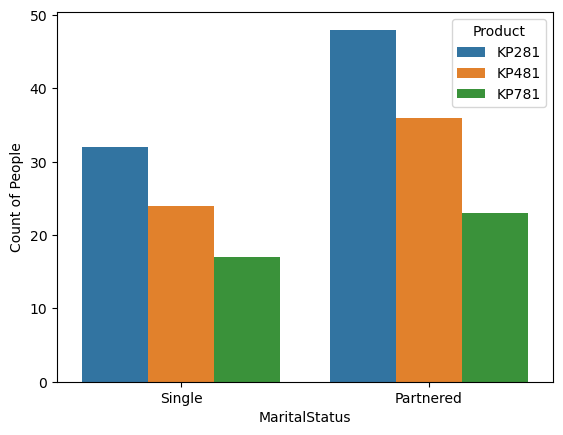

In [55]:
# Plotting the graph for 'Marital Status'

sns.countplot(data=df1, x='MaritalStatus', hue='Product')
plt.ylabel('Count of People')
plt.show()

### Conditional Probability of each column with products KP281 , KP481, KP781

In [56]:
cond_prob_age_product = crosstab_df_age.div(crosstab_df_age.sum(axis=1), axis=0)
print("\nConditional Probability of Age :")
print(cond_prob_age_product)


Conditional Probability of Age :
Age_groups  Active Achievers   Middles  Youngsters  All
Product                                                
KP281               0.200000  0.087500    0.212500  0.5
KP481               0.200000  0.066667    0.233333  0.5
KP781               0.212500  0.075000    0.212500  0.5
All                 0.202778  0.077778    0.219444  0.5


In [57]:
cond_prob_education_product = crosstab_df_edu.div(crosstab_df_edu.sum(axis=1), axis=0)
print("\nConditional Probability of Education:")
print(cond_prob_education_product)


Conditional Probability of Education:
Education        12        13        14        15        16        18  All
Product                                                                   
KP281      0.012500  0.018750  0.187500  0.025000  0.243750  0.012500  0.5
KP481      0.008333  0.016667  0.191667  0.008333  0.258333  0.016667  0.5
KP781      0.000000  0.000000  0.025000  0.000000  0.187500  0.287500  0.5
All        0.008333  0.013889  0.152778  0.013889  0.236111  0.075000  0.5


In [58]:
cond_prob_usage_product = crosstab_df_usage.div(crosstab_df_usage.sum(axis=1), axis=0)
print("\nConditional Probability of Usage :")
print(cond_prob_usage_product)


Conditional Probability of Usage :
Usage           2         3         4         5  All
Product                                             
KP281    0.118750  0.231250  0.137500  0.012500  0.5
KP481    0.116667  0.258333  0.100000  0.025000  0.5
KP781    0.000000  0.012500  0.225000  0.262500  0.5
All      0.091667  0.191667  0.144444  0.072222  0.5


In [59]:
cond_prob_income_product = crosstab_df_ig.div(crosstab_df_ig.sum(axis=1), axis=0)
print("\nConditional Probability of Income :")
print(cond_prob_income_product)


Conditional Probability of Income :
Income_groups      High  Low-Medium  Medium-High  All
Product                                              
KP281          0.037500    0.212500     0.250000  0.5
KP481          0.058333    0.125000     0.316667  0.5
KP781          0.362500    0.000000     0.137500  0.5
All            0.116667    0.136111     0.247222  0.5


In [60]:
cond_prob_fitness_product = crosstab_df_fitness.div(crosstab_df_fitness.sum(axis=1), axis=0)
print("\nConditional Probability of Fitness :")
print(cond_prob_fitness_product)


Conditional Probability of Fitness :
Fitness         2         3         4         5  All
Product                                             
KP281    0.093750  0.337500  0.056250  0.012500  0.5
KP481    0.108333  0.325000  0.066667  0.000000  0.5
KP781    0.000000  0.050000  0.087500  0.362500  0.5
All      0.077778  0.269444  0.066667  0.086111  0.5


In [61]:
cond_prob_miles_product = crosstab_df_miles.div(crosstab_df_miles.sum(axis=1), axis=0)
print("\nConditional Probability of Miles :")
print(cond_prob_miles_product)


Conditional Probability of Miles :
Miles_groups  Long Range  Medium Range  Short Range  All
Product                                                 
KP281           0.037500      0.350000     0.112500  0.5
KP481           0.066667      0.333333     0.100000  0.5
KP781           0.350000      0.150000     0.000000  0.5
All             0.116667      0.300000     0.083333  0.5


In [62]:
cond_prob_maritals_product = crosstab_df_marital_status.div(crosstab_df_marital_status.sum(axis=1), axis=0)
print("\nConditional Probability of Marital Status :")
print(cond_prob_maritals_product)


Conditional Probability of Marital Status :
MaritalStatus  Partnered    Single  All
Product                                
KP281           0.300000  0.200000  0.5
KP481           0.300000  0.200000  0.5
KP781           0.287500  0.212500  0.5
All             0.297222  0.202778  0.5


In [63]:
crosstab_product_gender = pd.crosstab(index=df1['Product'], columns=df1['Gender'], margins=True, margins_name="All")
prob_product_given_gender = crosstab_product_gender.div(crosstab_product_gender.loc['All'])

cond_prob_gender_product = crosstab_product_gender.div(crosstab_product_gender.sum(axis=1), axis=0)
print("\nConditional Probability of Gender and Product:")
print(cond_prob_gender_product)


Conditional Probability of Gender and Product:
Gender     Female      Male  All
Product                         
KP281    0.250000  0.250000  0.5
KP481    0.241667  0.258333  0.5
KP781    0.087500  0.412500  0.5
All      0.211111  0.288889  0.5


### Co relation among different factors :

In [64]:
num_cols = df1.select_dtypes(include=['float64', 'int64'])

''' Explanation: We are selecting only numeric columns (float64 and int64) from the dataset 
 for correlation calculation. This ensures that only numerical variables are included in 
 the correlation matrix, as correlation is a measure of linear association between 
 numerical variables.'''

# Calculating the correlation matrix
correlation_matrix = num_cols.corr()
print(correlation_matrix)

                Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.303753  0.016067  0.058088  0.555540  0.025002
Education  0.303753   1.000000  0.389479  0.437379  0.645252  0.358822
Usage      0.016067   0.389479  1.000000  0.660556  0.447165  0.779033
Fitness    0.058088   0.437379  0.660556  1.000000  0.506231  0.833085
Income     0.555540   0.645252  0.447165  0.506231  1.000000  0.489584
Miles      0.025002   0.358822  0.779033  0.833085  0.489584  1.000000


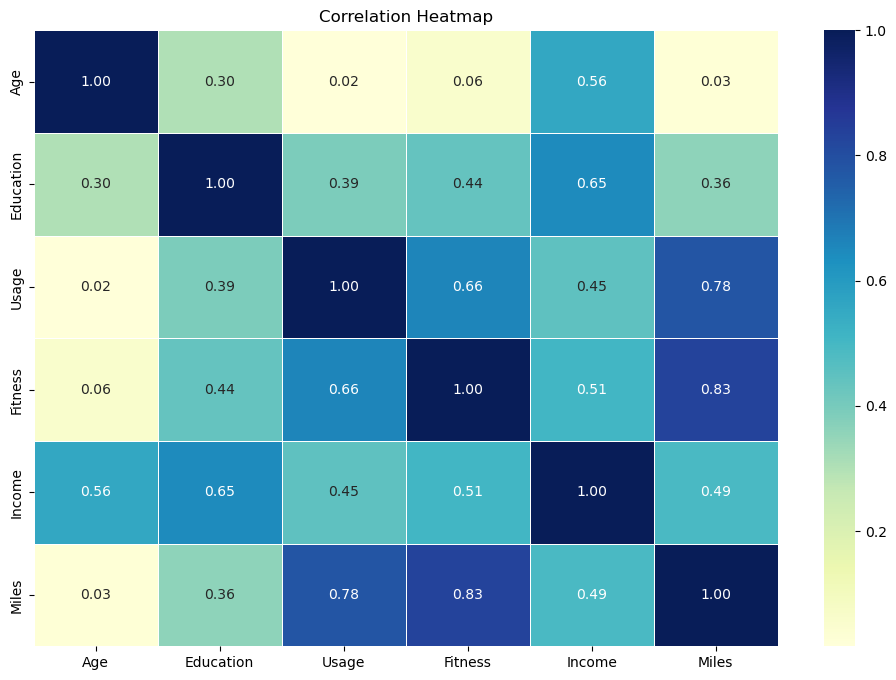

In [65]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [66]:
df1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_groups,Income_groups,Miles_groups
0,KP281,18,Male,14,Single,3,4,29562,112,Youngsters,Low-Medium,Medium Range
1,KP281,19,Male,15,Single,2,3,31836,75,Youngsters,Low-Medium,Medium Range
2,KP281,19,Female,14,Partnered,4,3,30699,66,Youngsters,Low-Medium,Medium Range
3,KP281,19,Male,12,Single,3,3,32973,85,Youngsters,Low-Medium,Medium Range
4,KP281,20,Male,13,Partnered,4,2,35247,47,Youngsters,Low-Medium,Short Range
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,18,Single,5,5,76331,183,Middles,High,Long Range
176,KP781,42,Male,18,Single,5,4,76331,183,Middles,High,Long Range
177,KP781,45,Male,16,Single,5,5,76331,160,Middles,High,Long Range
178,KP781,45,Male,18,Partnered,4,5,76331,120,Middles,High,Medium Range


# Overall Report

### Summarized Insights:

**<u>Age</u>**:
* KP281: Broad appeal across all age groups.
* KP481: Maintains presence across different age groups with a specific niche.
* KP781: Fewest customers, mostly Youthful Explorers and some Prime Trailblazers.

**<u>Education</u>**:
* KP281 and KP481 are preferred across all education levels, with KP281 being the most popular.
* KP781 is less popular across all education levels, especially for higher education levels.

**<u>Usage</u>**:
* KP281 and KP481 commonly used 3 days a week, while KP781 primarily used 4 and 5 days a week.

**<u>Income</u>**:
* KP281 and KP481 cater to a wider income range, while KP781 targets the high-income group.
* Untapped potential in the Low-Medium income group for KP281 and KP481.

**<u>Miles</u>**:
* KP281 lacks presence across all mileage ranges.
* KP781 performs exceptionally well in medium-range miles.
* KP481 leads in short range but needs analysis for improvement.

**<u>Fitness</u>**:
* KP281 and KP481 are preferred across all consumers with all fitness levels.
* KP781 associated with consumers with higher self-rated fitness levels

**<u>Gender</u>**:

* Slight male majority in purchases.
* KP281 equally popular among genders.
* KP781 has a higher proportion of male customers.

**<u>Marital Status</u>**:
* Partnered individuals are the larger customer segment.
* KP281 is the top-selling product across both marital statuses.
* Consistent sales patterns for KP481 and KP781 across both segments.

### Overall Insights:
* KP281 appears to have broad appeal across different demographics and usage patterns.
* KP481 serves a specific niche and maintains moderate presence across segments.
* KP781 targets higher-income, more advanced education, and fitness-oriented customers but with lower overall sales.
* There is potential for growth in untapped segments such as Low-Medium income and specific education levels.
* Gender and marital status don't seem to heavily influence treadmill preference. As market segmentation of Partnered being %59.45 and Single being %40.55 as well as Male being %57.77 and Female being %42.22.
* Marketing strategies could be tailored to enhance performance in areas where products are underperforming, such as increasing KP281's presence across mileage ranges or repositioning KP481 in the market.



### Overall Product-wise Recommendation:


**<u>KP281</u>**:
* Age: Continue targeting all age groups but consider diversifying marketing to appeal to specific age segments.
* Education: Allocate marketing resources to maintain stronghold, especially at education level 16.
* Usage: Focus on optimizing production and inventory management for frequent users.
* Income: Develop targeted campaigns for the Low-Medium income segment, highlighting affordability.
* Miles: Assess market demand for product enhancement and diversify offerings accordingly.
* Fitness: Tailor marketing to highlight overall health benefits.
* Gender: Expand product line to attract a more diverse customer base.
* Marital Status: Explore opportunities to tailor marketing efforts towards specific marital statuses.


**<u>KP481</u>**:
* Age: Tailor marketing strategies to resonate with different age groups' preferences.
* Education: Invest in targeted campaigns to maintain stronghold, especially at education level 16.
* Usage: Focus on production optimization for frequent users and conduct customer surveys for improvements.
* Income: Develop campaigns targeting the Low-Medium income segment.
* Miles: Tailor marketing and assess market demand for product enhancement.
* Fitness: Focus on highlighting endurance and strength gains.
* Gender: Expand product line to appeal to both genders.
* Marital Status: Explore opportunities for targeted promotions based on marital status.


**<u>KP781</u>**:
* Age: Investigate reasons for lower popularity among certain age groups and make necessary improvements.
* Education: Invest in targeted campaigns to capitalize on rising popularity at education level 18.
* Usage: Explore ways to expand the market by highlighting unique benefits.
* Income: Consider adjusting marketing strategies or product positioning to better communicate the value proposition.
* Miles: Assess market demand for product enhancement.
* Fitness: Analyze aspects contributing to higher fitness perception and incorporate similar features into other products.
* Gender: Tailor marketing strategies to appeal more to the less represented gender.
* Marital Status: Explore opportunities for targeted promotions based on marital status.

### Business Decisions:

* **<u>Product Focus</u>**: Invest in enhancing features of the popular KP281 treadmill and maintaining competitiveness of KP481.
* **<u>Targeted Marketing</u>**: Tailor marketing campaigns to highlight the versatility of KP281 and niche appeal of KP781.
* **<u>Market Expansion</u>**: Explore new demographics and international markets based on identified preferences.
* **<u>Pricing Strategy</u>**: Price KP281 as a premium option and KP781 competitively to attract cost-conscious consumers.
* **<u>Feedback Integration</u>**: Continuously gather customer feedback to improve product offerings and customer satisfaction.
* **<u>Distribution Optimization</u>**: Optimize distribution channels to ensure availability and accessibility of products to target customers.